In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [7]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<function matplotlib.pyplot.show(*args, **kw)>

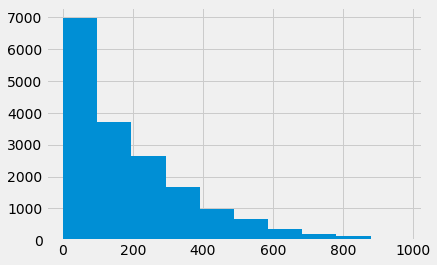

In [8]:
plt.hist(bike_rentals["cnt"])
plt.show

In [9]:
bike_rentals.corr()["cnt"]


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [10]:
# Feature engineering
    # Create new columns to show certain hours are related

def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

### Linear Regression

MSE works on continuous numeric data, which fits our data quite well.

In [11]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [12]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()
reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])
MSE = np.mean((predictions - test["cnt"]) ** 2)
MSE

17275.63433518709

Linear Regression
* Advantage: Fairly resistant to overfitting because it's straightforward.
* Disadtange: Prone to underfitting the data, however, not building a powerful enough model

#### Decision trees

* Advantage: Predict outcomes much more reliably than linear regression models
* Disadvantage: Tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. 
* Disadvantage2: Prone to instability -- small changes in the input data can result in a very different output model.



In [15]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])
MSE2 = np.mean((predictions - test["cnt"]) ** 2)
MSE2

2586.910571126187

In [16]:
reg = DecisionTreeRegressor(min_samples_leaf=2)
reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])
MSE3 = np.mean((predictions - test["cnt"]) ** 2)
MSE3

2851.1582757959354

#### Random forests

* Advantage: overfit much less than decision trees

In [18]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])
MSE4 = np.mean((predictions - test["cnt"]) ** 2)
MSE4


C:\Users\shane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1978.1375866128674